Libraries imported successfully
scikit-learn version: 1.6.1
Artifact directories created
Loading dataset...
Dataset loaded successfully
Raw shape: (58976, 28)
Columns: ['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location', 'AdmitDiagnosis', 'insurance', 'religion', 'marital_status', 'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs', 'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum']
Target-like columns found: ['ExpiredHospital']
Using target column: ExpiredHospital
ExpiredHospital
0    53122
1     5854
Name: count, dtype: int64
Mapped mortality distribution (0=alive,1=dead):
mortality
0    53122
1     5854
Name: count, dtype: int64
Dropping from features: ['hadm_id', 'ExpiredHospital']
Dataset shape for modelling (incl. mortality): (58976, 27)


,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,LOSgroupNum,mortality
0,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,493.89,2,0
1,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,465.71,2,0
2,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,344.00,4,0
3,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,603.05,2,0
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,679.84,2,0



COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
Dataset shape: (58976, 27)
Number of features: 26
Memory usage: 38.65 MB

2. TARGET VARIABLE ANALYSIS


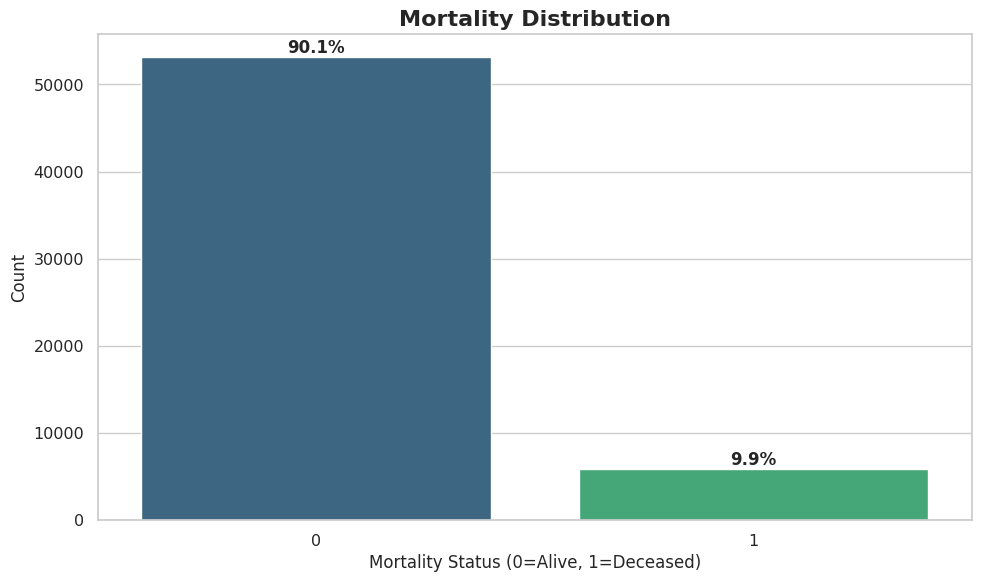

Mortality rate: 9.93%
Class imbalance ratio: 9.07:1

3. DATA TYPES AND MISSING VALUES
Data type distribution:
  float64: 15
  object: 9
  int64: 3

Features with missing values:
                Missing Values  Percentage
marital_status           10128   17.173087
religion                   458    0.776587
AdmitDiagnosis              25    0.042390


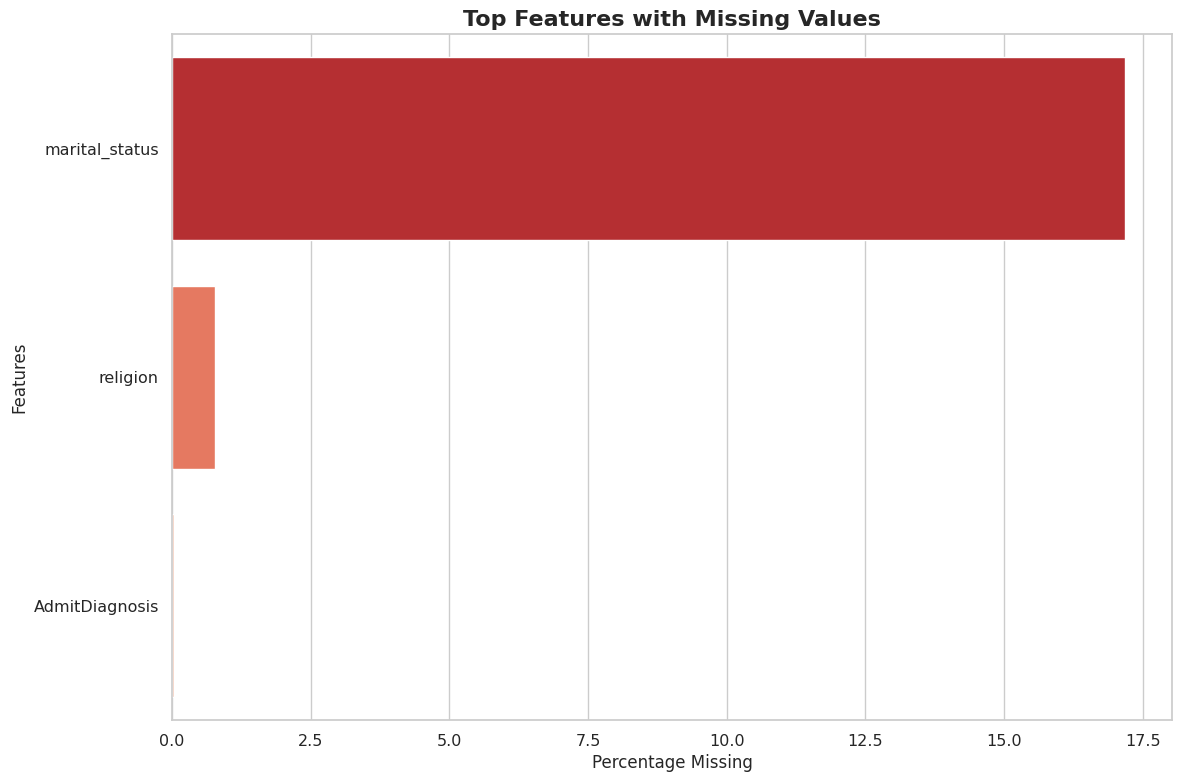


4. NUMERIC FEATURES ANALYSIS
Number of numeric features: 17


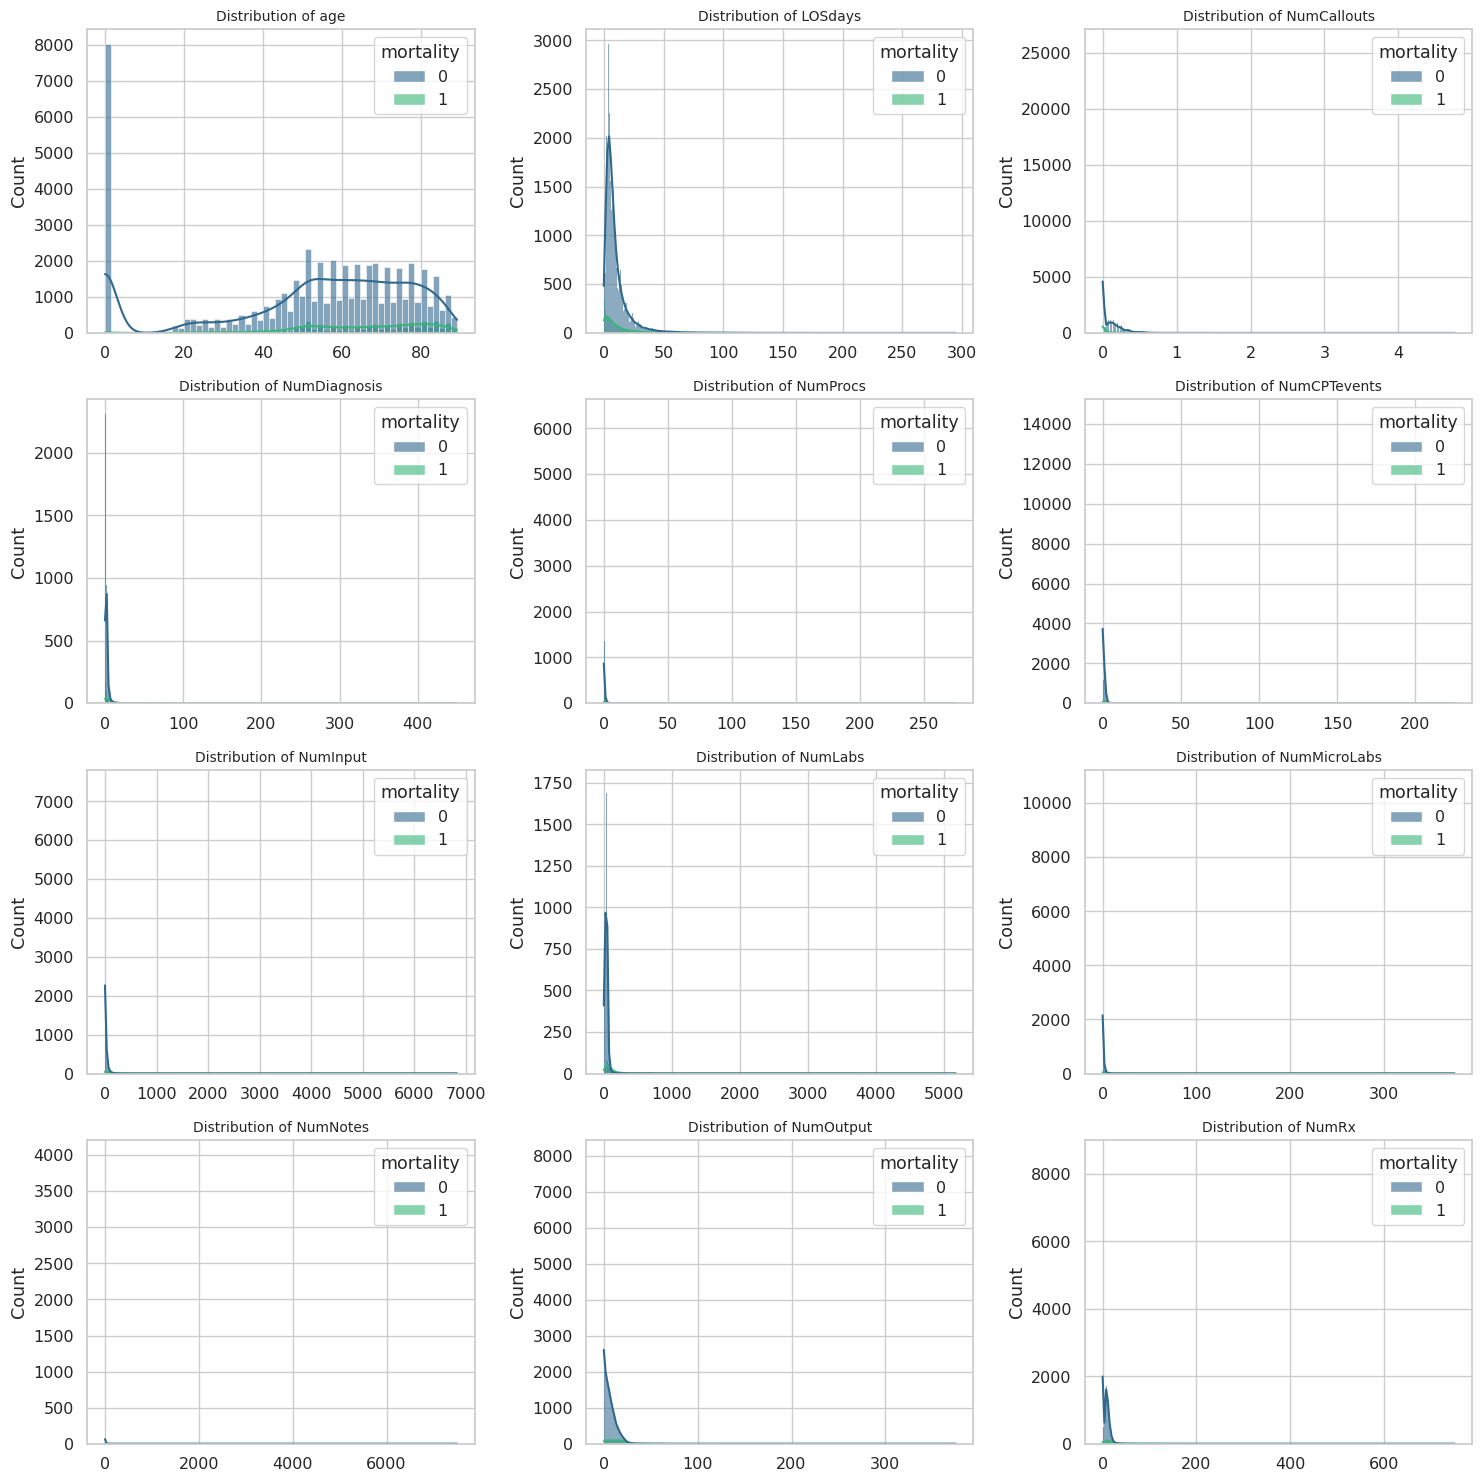

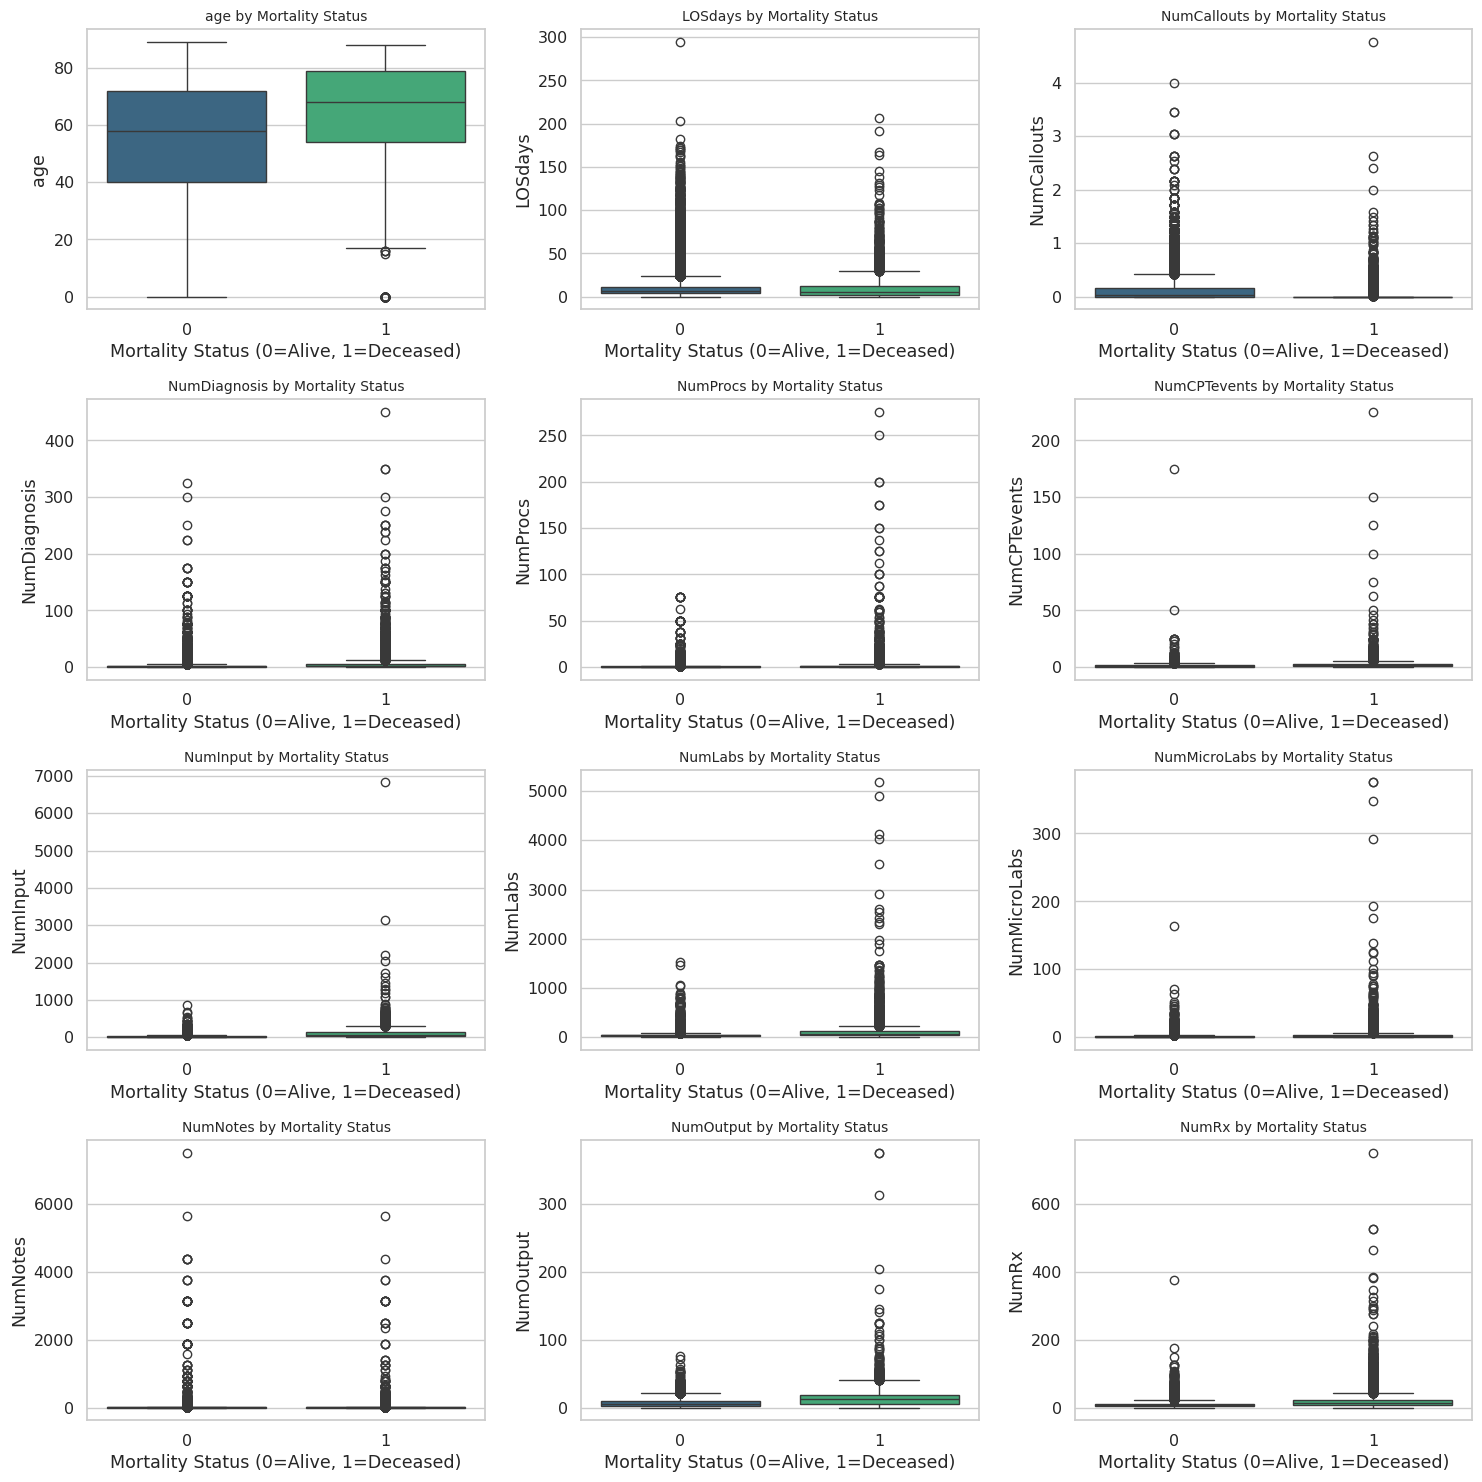

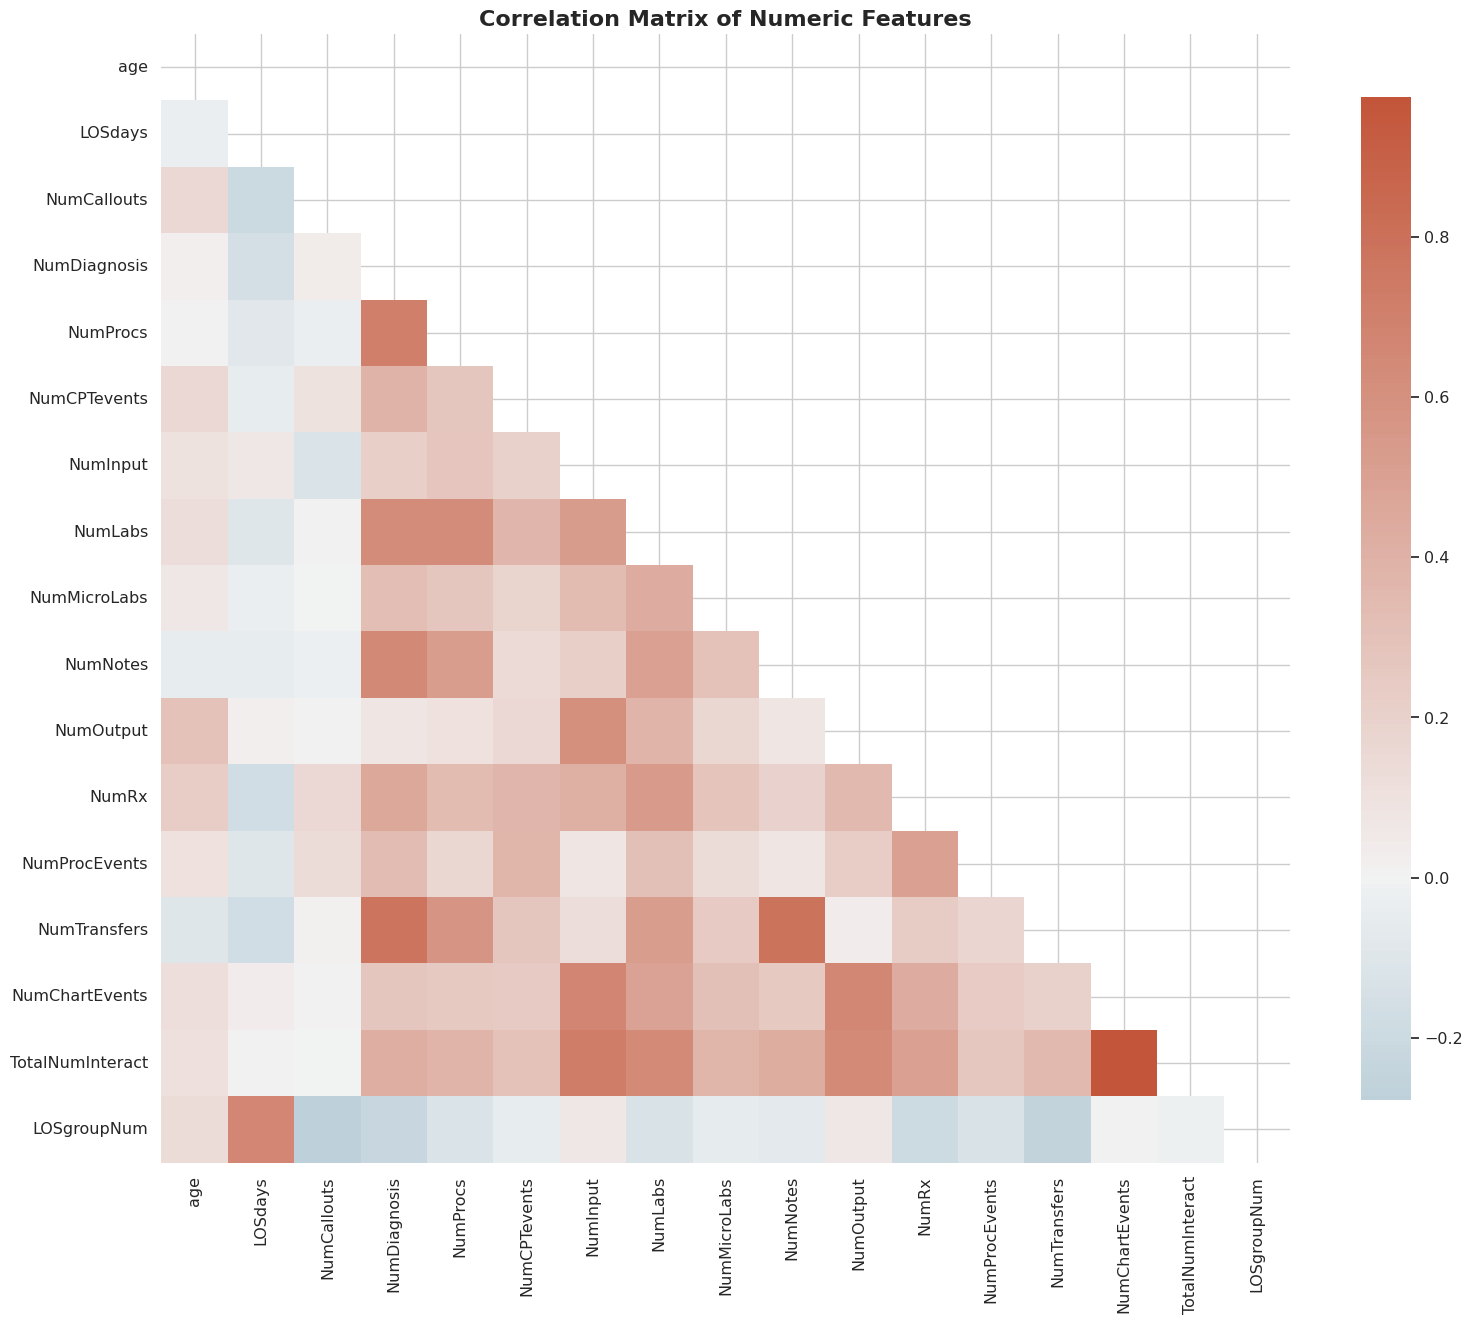

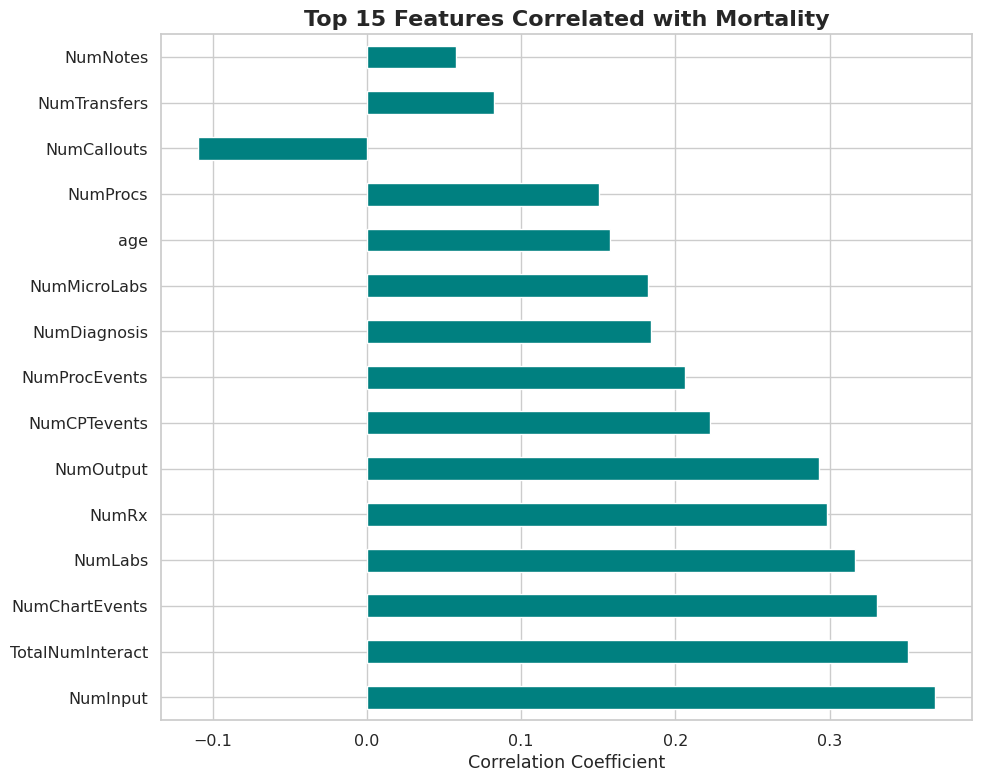


5. CATEGORICAL FEATURES ANALYSIS
Number of categorical features: 9


<Figure size 1200x800 with 0 Axes>

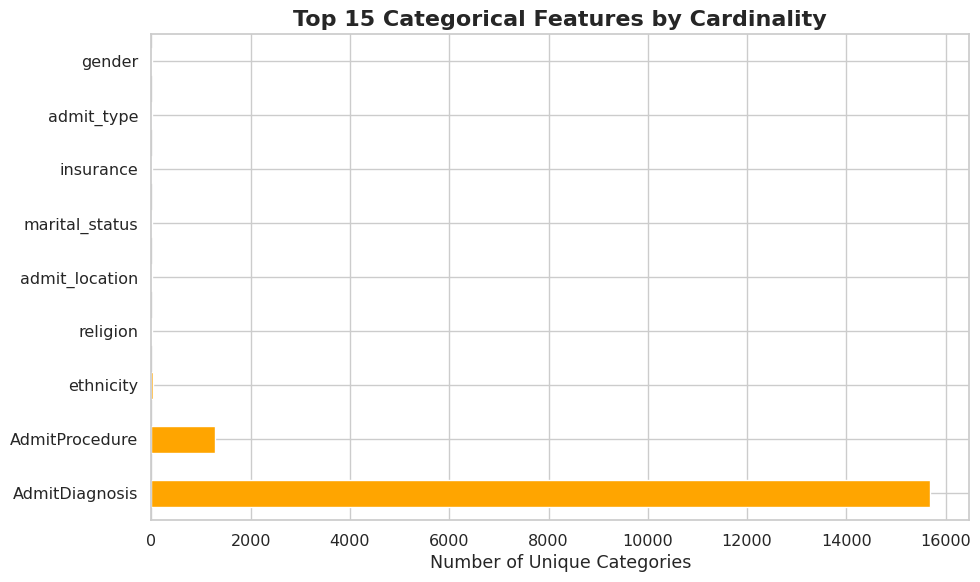

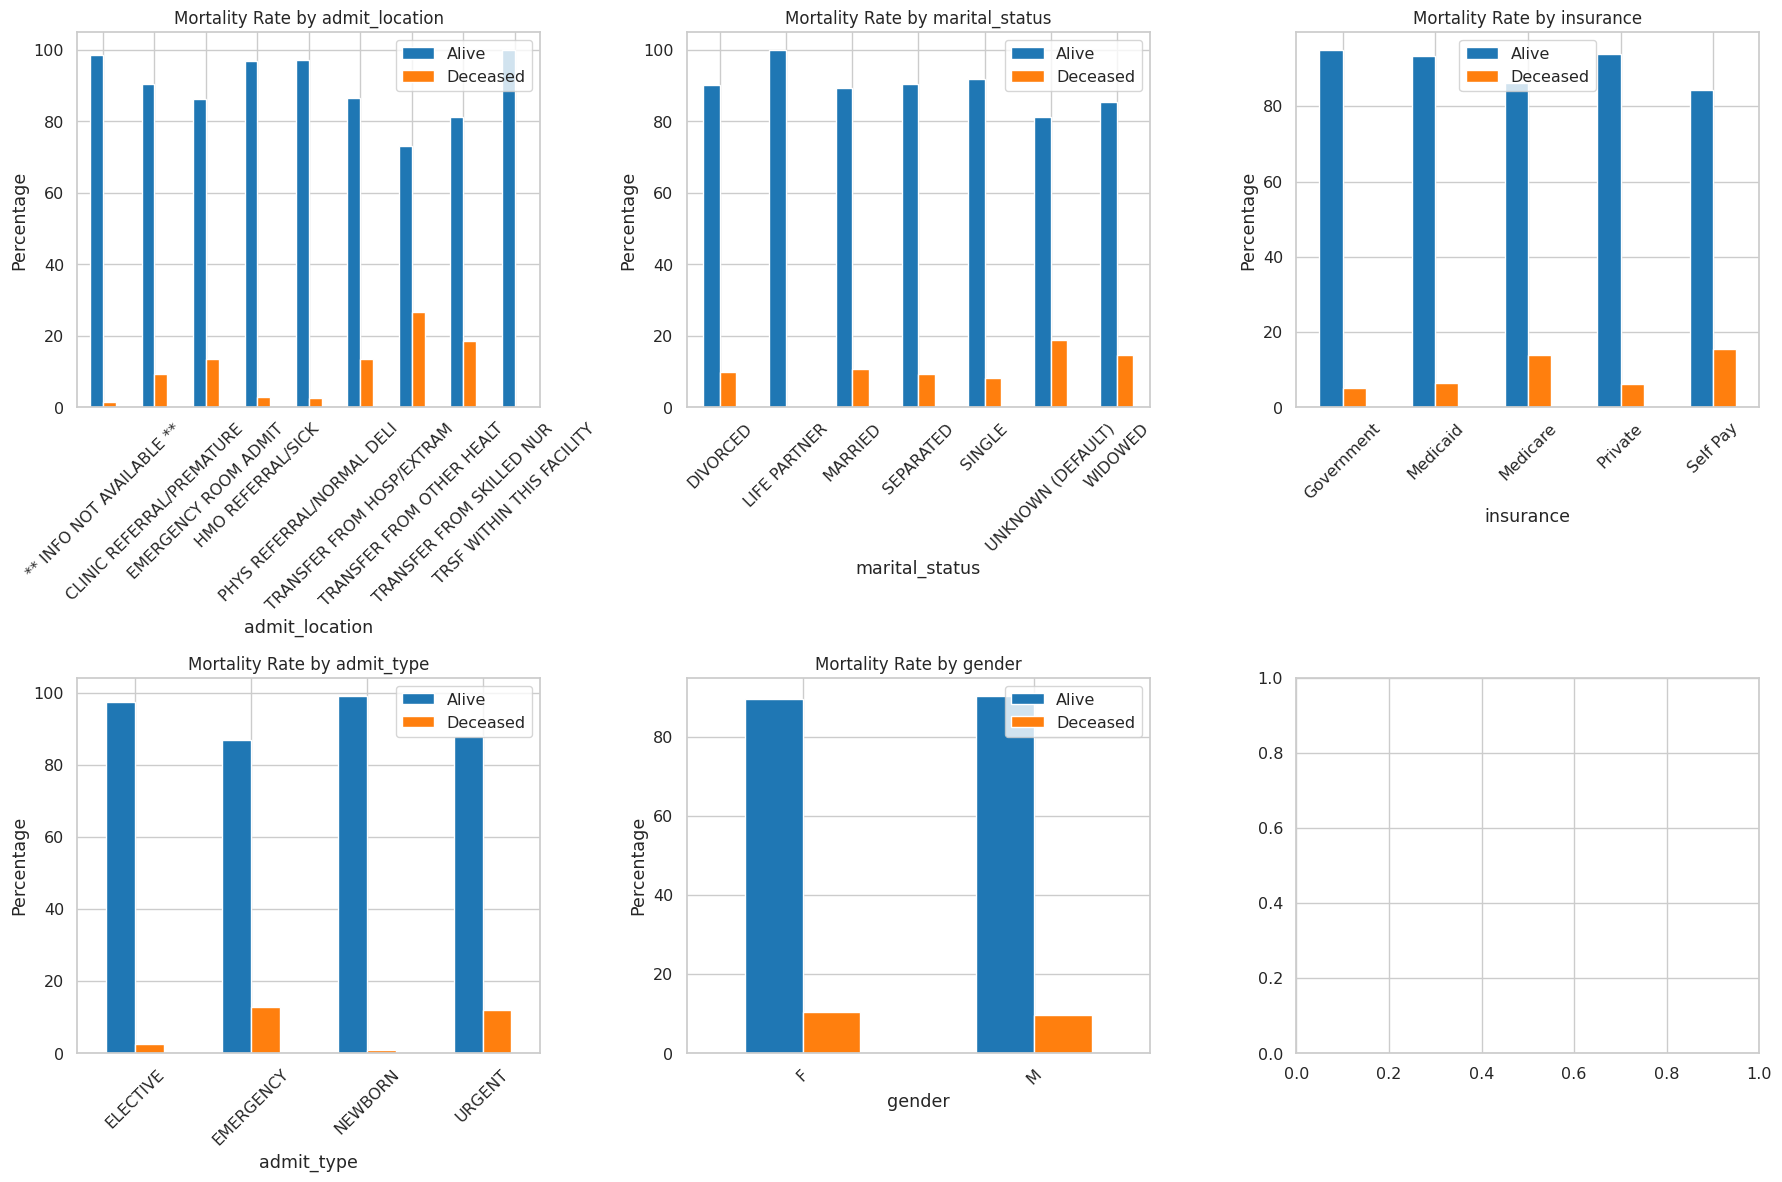


6. OUTLIER DETECTION


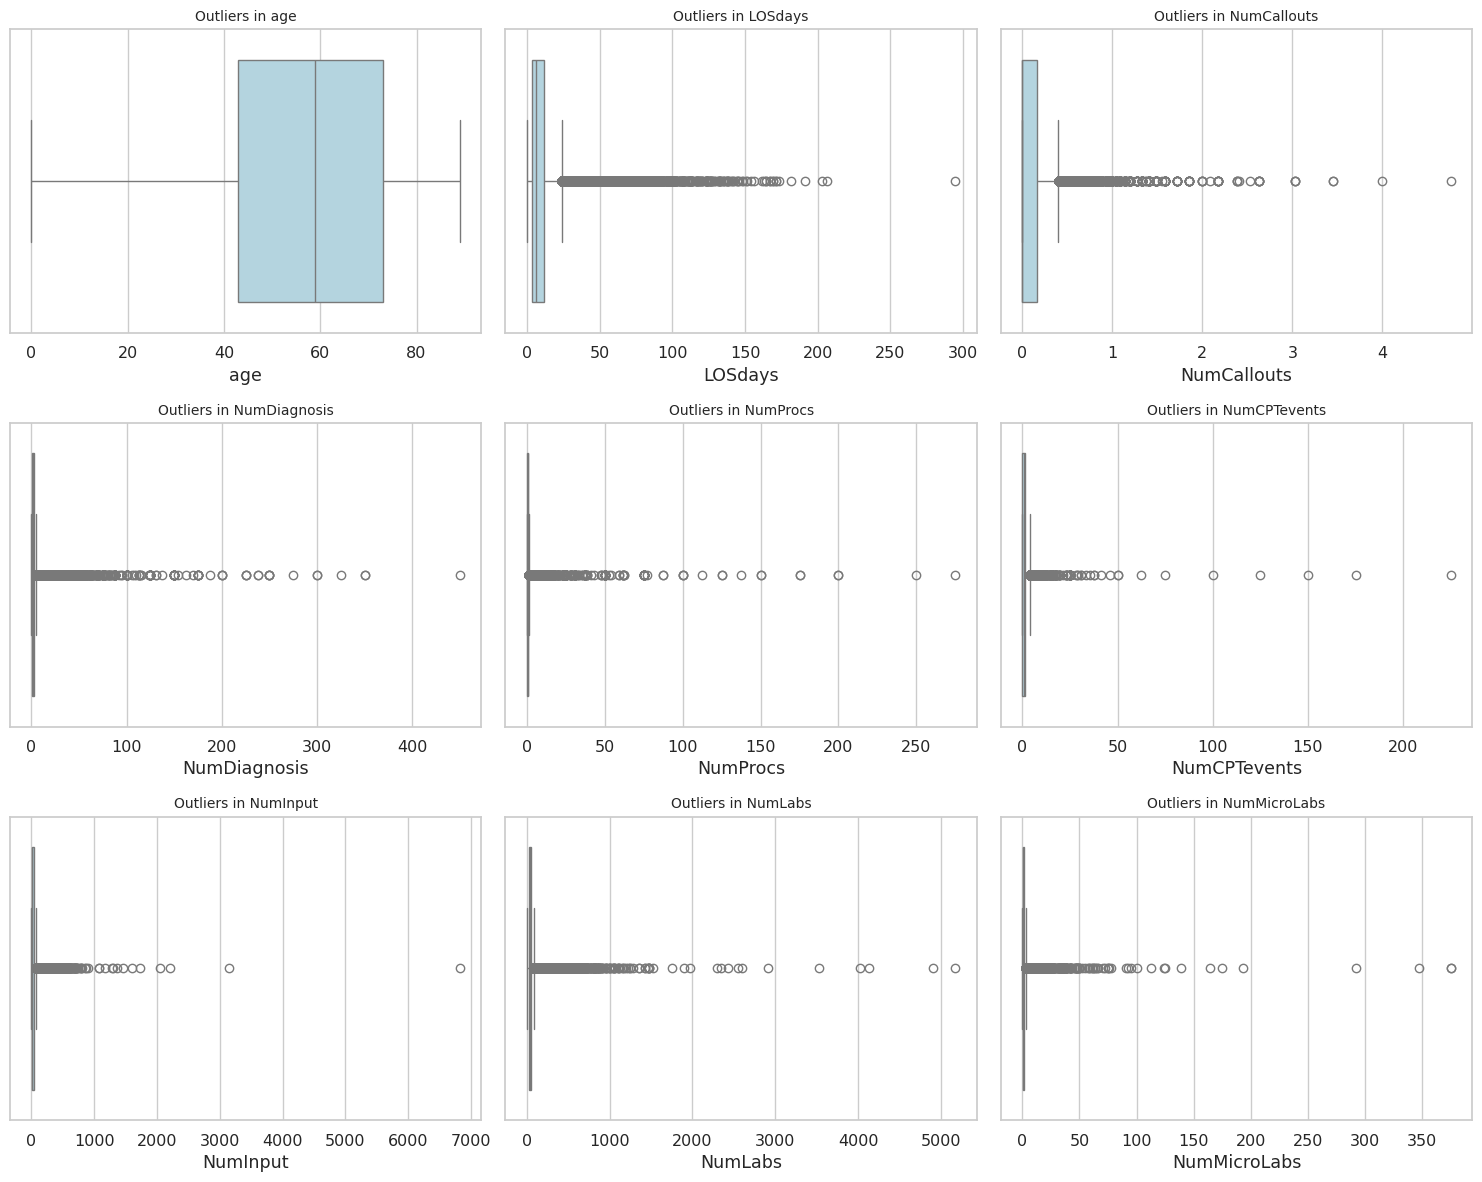


EDA completed. All plots and summaries saved to: /content/drive/MyDrive/fyp_artifacts/eda

DATA PREPROCESSING
Numeric cols: 17, Categorical cols: 9
After cardinality reduction: categorical cols count = 9
Performing domain-informed feature engineering...
Created age_group from age
Added polynomial interaction features (sample): ['TotalNumInteract' 'NumChartEvents' 'NumNotes' 'NumLabs' 'NumInput' 'age']
Train/test shapes: (47180, 48) (11796, 48) Positives in train: 4683
One-hot encoding (low-card): ['gender', 'admit_type', 'admit_location', 'AdmitDiagnosis', 'insurance', 'religion', 'marital_status', 'ethnicity', 'age_group']
Applying SMOTE for class balancing...
After SMOTE train shape: (84994, 92) Positives: 42497
Performing feature selection...
Selected features (top 30):
['admit_location_EMERGENCY ROOM ADMIT', 'religion_CATHOLIC', 'marital_status_SINGLE', 'marital_status_MARRIED', 'gender_M', 'NumCallouts', 'religion_NOT SPECIFIED', 'admit_location_CLINIC REFERRAL/PREMATURE', 'admit

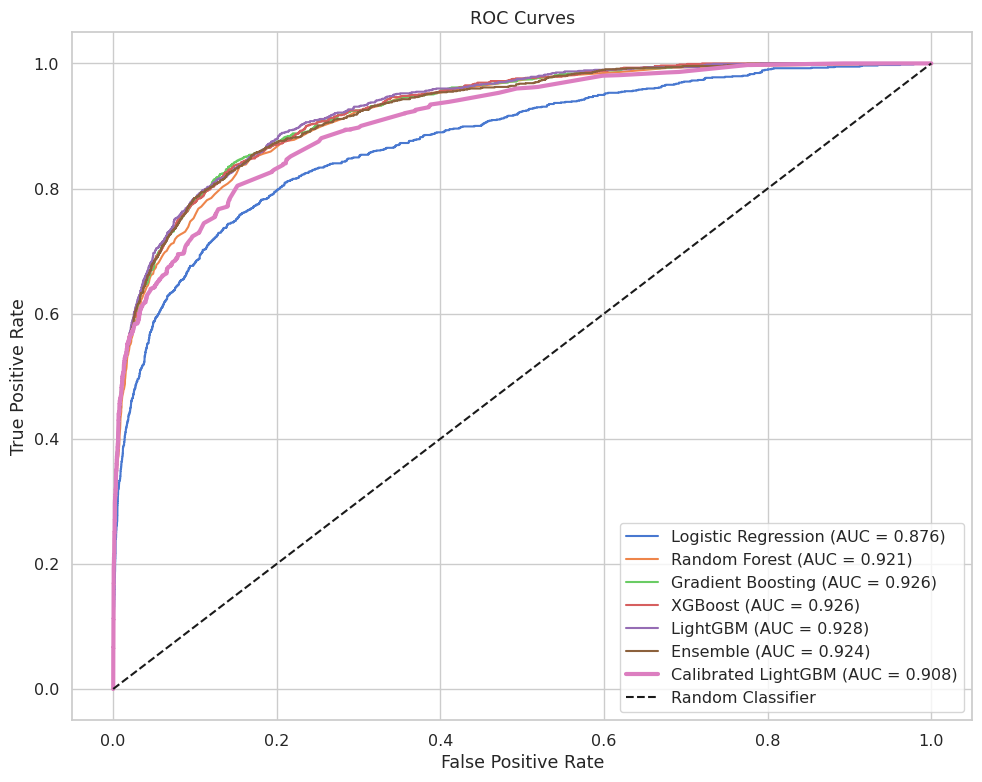

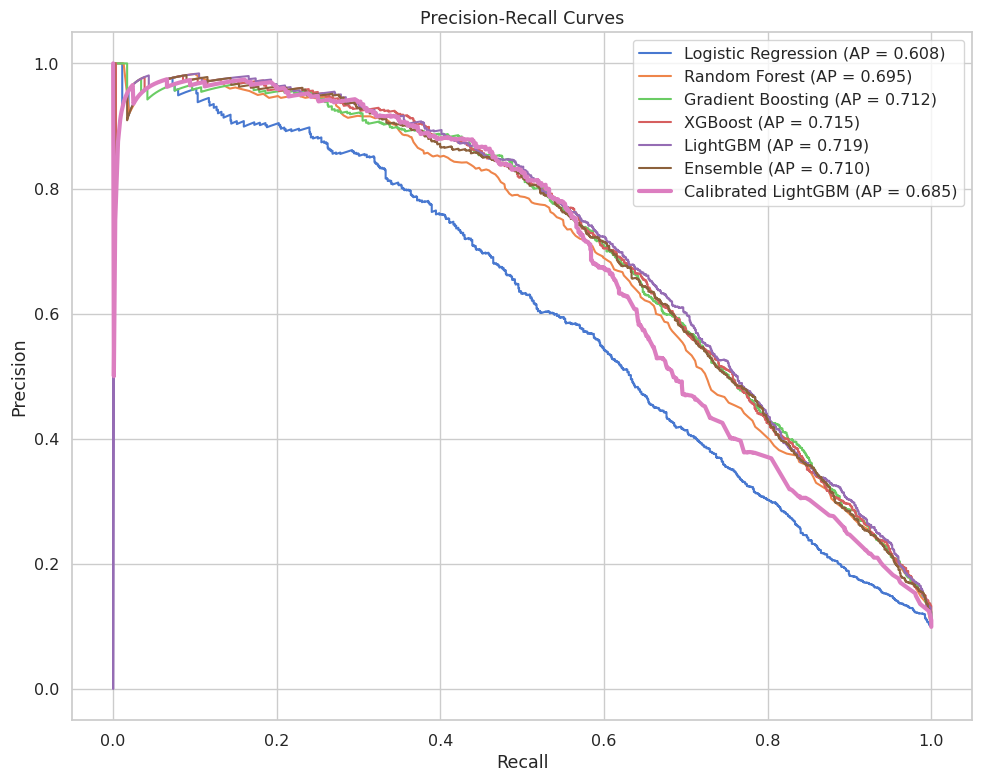

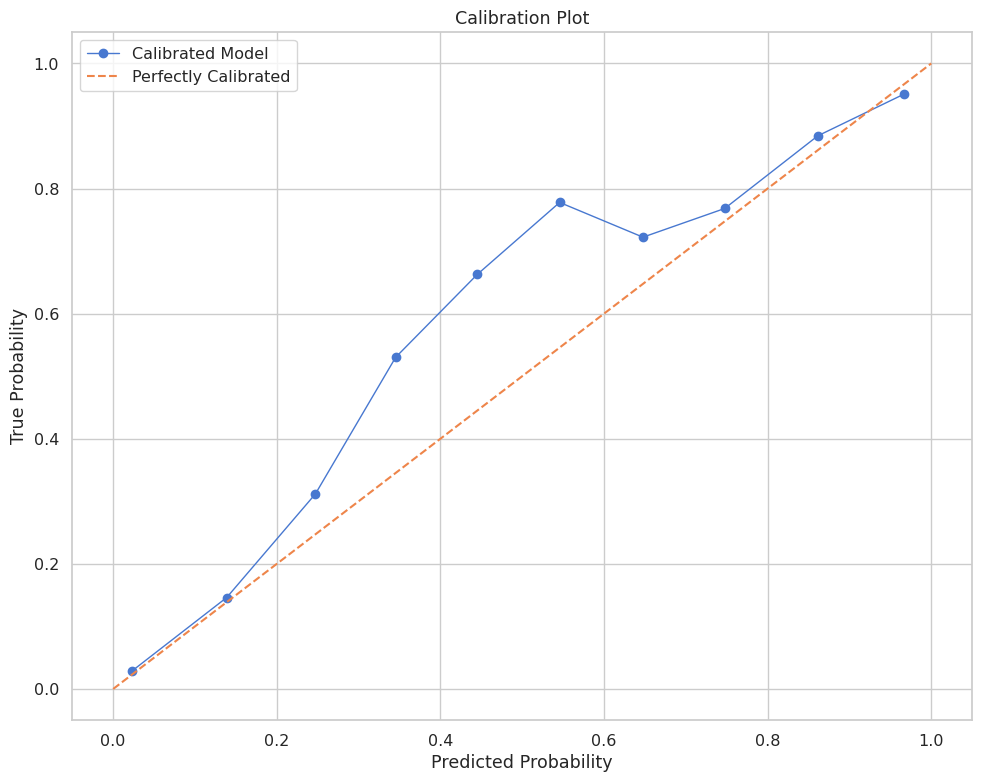

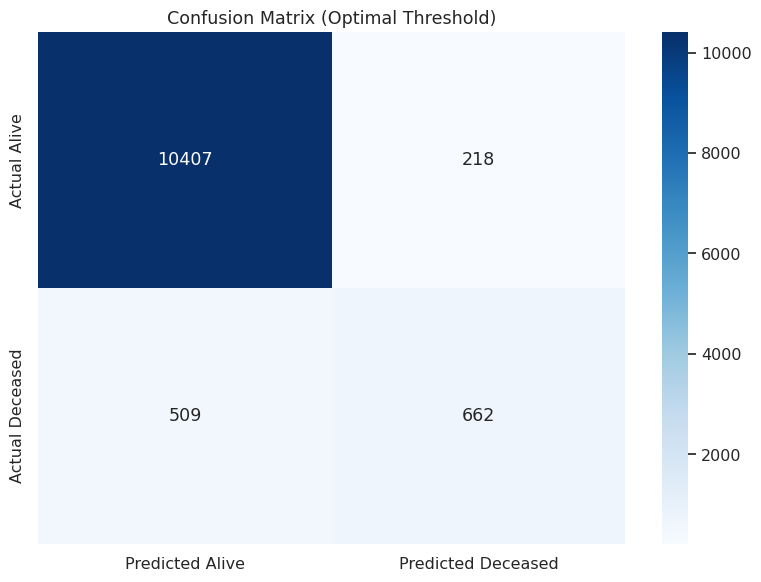

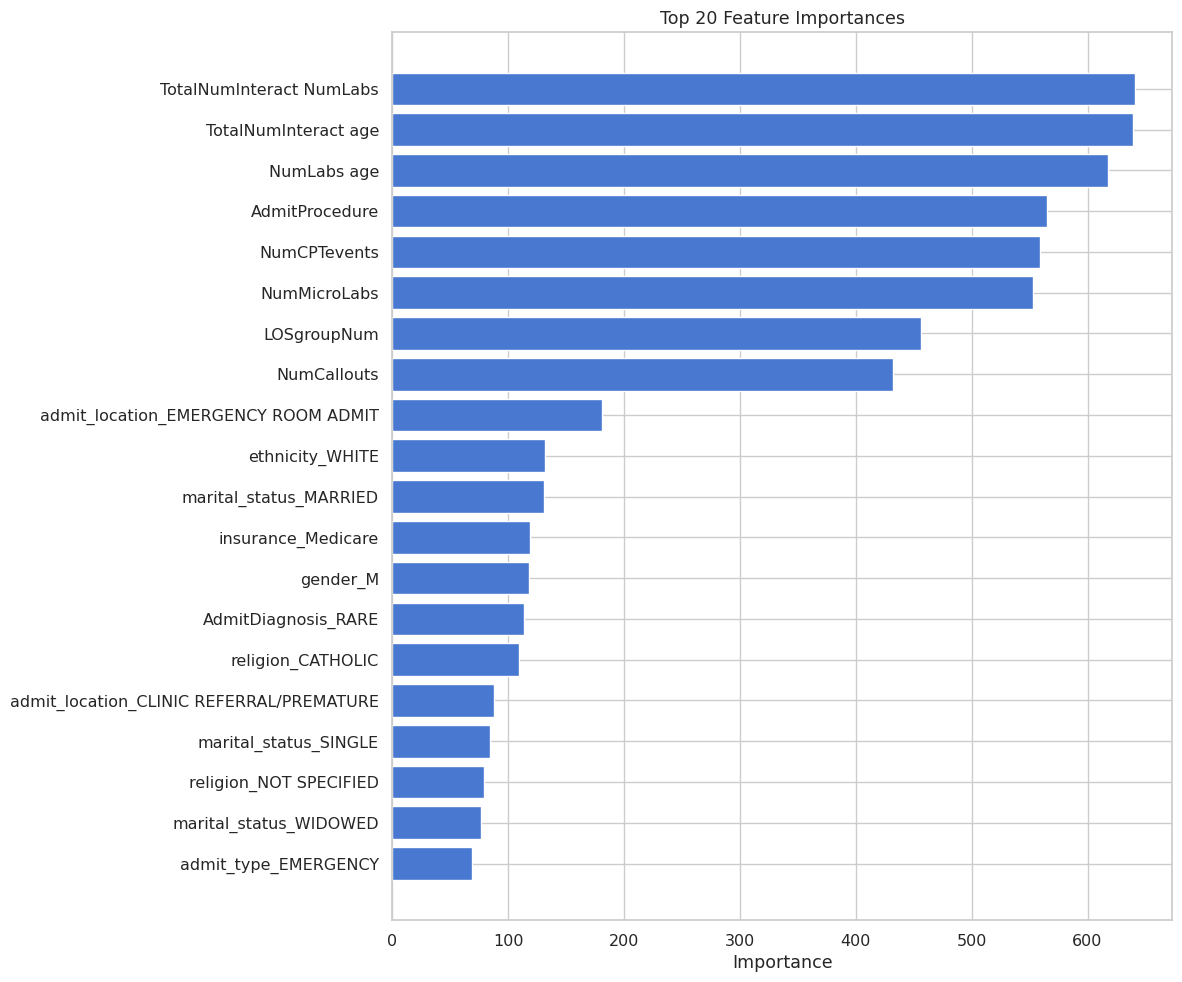


MODEL INTERPRETATION WITH SHAP


100%|===================| 11748/11796 [01:41<00:00]       

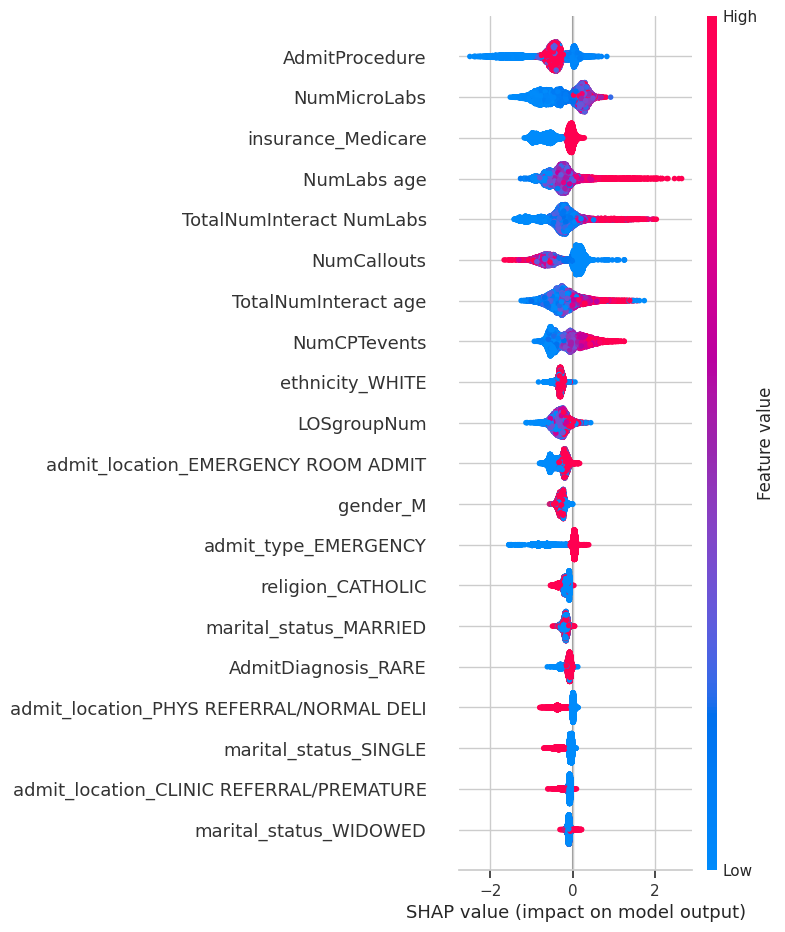

<Figure size 1000x600 with 0 Axes>

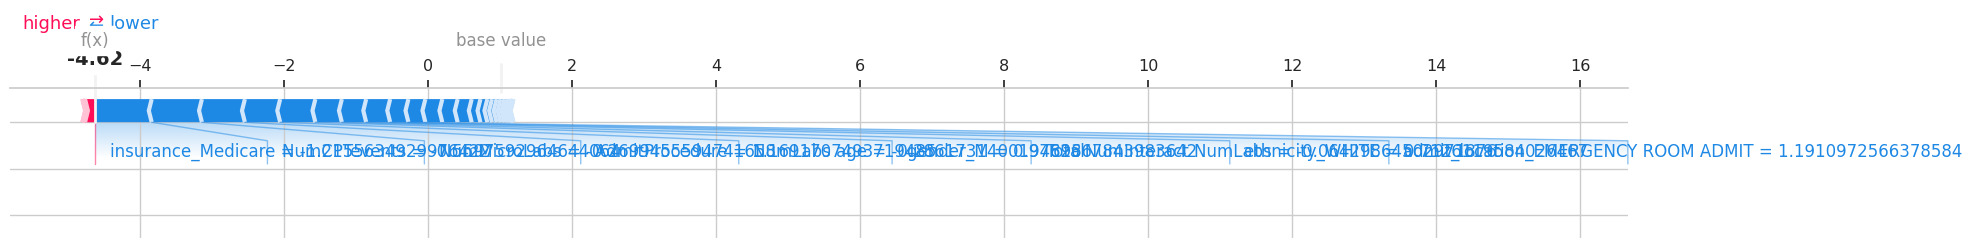

<Figure size 1000x600 with 0 Axes>

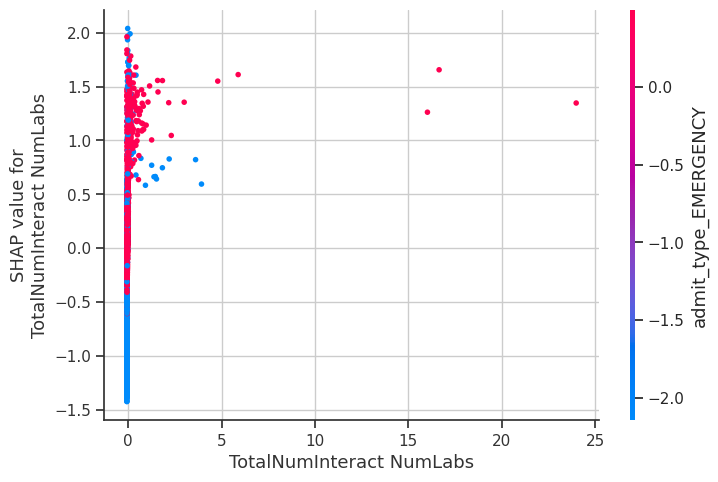

SHAP analysis completed and plots saved

FINAL RESULTS AND ARTIFACTS

MIMIC-III Mortality Prediction Model Report
Generated on: 2025-09-10 18:48:47

Dataset Information:
- Original shape: (58976, 29)
- Features after preprocessing: 30
- Training samples: 84994
- Test samples: 11796
- Mortality rate: 9.93%

Best Model: LightGBM
- ROC AUC: 0.9283
- Average Precision: 0.7189
- F1 Score: 0.6416

Calibrated Model Performance:
- ROC AUC: 0.9085
- Average Precision: 0.6849
- F1 Score: 0.5668

With Optimal Threshold (0.2565):
- Accuracy: 0.9384
- Precision: 0.7523
- Recall: 0.5653
- F1 Score: 0.6455

Top 5 Features:
                     feature  importance
19  TotalNumInteract NumLabs         641
20      TotalNumInteract age         639
24               NumLabs age         618
16            AdmitProcedure         565
18              NumCPTevents         559


All artifacts saved to: /content/drive/MyDrive/fyp_artifacts
Pipeline completed successfully!


In [1]:
# =========================================================
# MIMIC3C Mortality Prediction Pipeline (Colab-ready)
# Complete pipeline with comprehensive EDA, preprocessing, modeling, and evaluation
# =========================================================

# ------------------------------
# Imports & Setup
# ------------------------------
import os
import json
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from datetime import datetime

from google.colab import files, drive
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             roc_curve, precision_recall_curve, classification_report)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import shap

warnings.filterwarnings("ignore")
np.random.seed(42)
sns.set(style="whitegrid", palette="muted", font_scale=1.05)
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully")
print("scikit-learn version:", sklearn.__version__)

# ------------------------------
# Paths (Drive is mounted at /content/drive)
# ------------------------------
BASE_PATH = '/content/drive/MyDrive'
ARTIFACT_PATH = os.path.join(BASE_PATH, 'fyp_artifacts')
os.makedirs(ARTIFACT_PATH, exist_ok=True)

# Create subdirectories for better organization
EDA_PATH = os.path.join(ARTIFACT_PATH, 'eda')
MODELS_PATH = os.path.join(ARTIFACT_PATH, 'models')
RESULTS_PATH = os.path.join(ARTIFACT_PATH, 'results')
os.makedirs(EDA_PATH, exist_ok=True)
os.makedirs(MODELS_PATH, exist_ok=True)
os.makedirs(RESULTS_PATH, exist_ok=True)

print("Artifact directories created")

# ------------------------------
# Flexible dataset loader with improved Google Drive handling
# ------------------------------
DEFAULT_FILENAME = "mimic3c.csv"

def try_find_in_drive(rel_paths=None):
    for rp in (rel_paths or [DEFAULT_FILENAME, "mimic3c/" + DEFAULT_FILENAME, "mimic3c/mimic3c.csv"]):
        full = os.path.join('/content/drive/MyDrive', rp)
        if os.path.exists(full):
            return full
    return None

def load_dataset_auto(filename=DEFAULT_FILENAME):
    # 1) local
    if os.path.exists(filename):
        print(f"Found local file: {filename}")
        return pd.read_csv(filename)

    # 2) upload prompt
    print("File not found locally. Please upload the CSV file or allow Drive mounting.")
    uploaded = files.upload()
    if uploaded:
        # Get the first uploaded file regardless of name
        uploaded_filename = list(uploaded.keys())[0]
        print(f"Loaded from upload: {uploaded_filename}")
        return pd.read_csv(uploaded_filename)

    # 3) try drive - with better mounting handling
    print("Attempting to access Google Drive...")
    try:
        # Check if drive is already mounted
        if not os.path.exists('/content/drive/MyDrive'):
            drive.mount('/content/drive', force_remount=False)
        else:
            print("Google Drive is already mounted.")
    except Exception as e:
        print(f"Error mounting Google Drive: {e}")
        print("Trying to unmount and remount...")
        try:
            from google.colab import runtime
            runtime.unmount()
            drive.mount('/content/drive', force_remount=True)
        except Exception as e2:
            print(f"Failed to remount: {e2}")
            # Continue without drive

    drive_candidate = try_find_in_drive()
    if drive_candidate is not None:
        print(f"Loaded from Google Drive: {drive_candidate}")
        return pd.read_csv(drive_candidate)

    # 4) help user
    if os.path.exists('/content/drive/MyDrive'):
        top_items = os.listdir('/content/drive/MyDrive')[:50]
        print("Could not auto-find the file in Drive. Example top-level MyDrive items:")
        for p in top_items:
            print("-", p)
    else:
        print("Google Drive is not accessible.")

    raise FileNotFoundError(f"{filename} not found locally, via upload, or in common Drive paths. Please upload or move the file to MyDrive root or a known subfolder.")

# ------------------------------
# Load dataset
# ------------------------------
print("Loading dataset...")
try:
    df = pd.read_csv("mimic3c (1).csv")
    print("Dataset loaded successfully")
except:
    print("Trying alternative loading method...")
    df = load_dataset_auto()

print("Raw shape:", df.shape)
print("Columns:", df.columns.tolist())

# ------------------------------
# Detect mortality target column
# ------------------------------
candidates = [c for c in df.columns if any(k in c.lower() for k in ['expire','expired','death','mort','dead'])]
print("Target-like columns found:", candidates)
target_col = None
for c in candidates:
    nunique = df[c].nunique(dropna=False)
    dtype = df[c].dtype
    if nunique <= 3 or pd.api.types.is_bool_dtype(dtype) or pd.api.types.is_integer_dtype(dtype):
        target_col = c
        break
if target_col is None and len(candidates) > 0:
    target_col = candidates[0]
if target_col is None:
    raise ValueError("No mortality-like column found. Please ensure dataset has a column like 'ExpiredHospital' or similar.")

print("Using target column:", target_col)
print(df[target_col].value_counts(dropna=False).head(20))

# ------------------------------
# Canonicalise target to 0/1 -> df['mortality']
# ------------------------------
y_raw = df[target_col]
if pd.api.types.is_bool_dtype(y_raw):
    df['mortality'] = y_raw.astype(int)
elif pd.api.types.is_numeric_dtype(y_raw):
    unique_vals = sorted([float(x) for x in pd.Series(y_raw.unique()).dropna().tolist()])
    if set(unique_vals) == {0.0, 1.0}:
        df['mortality'] = y_raw.astype(int)
    elif set(unique_vals) == {1.0, 2.0}:
        df['mortality'] = y_raw.replace({2:0}).astype(int)
    else:
        df['mortality'] = (y_raw != 0).astype(int)
else:
    df['mortality'] = df[target_col].astype(str).str.contains('dead|deceased|expire|1|yes|true', case=False, na=False).astype(int)

print("Mapped mortality distribution (0=alive,1=dead):")
print(df['mortality'].value_counts())

# ------------------------------
# Drop identifiers and original target from features
# ------------------------------
drop_ids = ['hadm_id','subject_id','icustay_id','row_id','HADM_ID','SUBJECT_ID','ICUSTAY_ID','ROW_ID']
drop_cols = [c for c in drop_ids if c in df.columns]
drop_cols.append(target_col)
print("Dropping from features:", drop_cols)
df_model = df.drop(columns=drop_cols, errors='ignore').copy()

# ------------------------------
# Quick checks
# ------------------------------
print("Dataset shape for modelling (incl. mortality):", df_model.shape)
display(df_model.head())

# =========================================================
# COMPREHENSIVE EDA SECTION
# =========================================================
print("\n" + "="*50)
print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("="*50)

# 1. Dataset Overview
print("\n1. DATASET OVERVIEW")
print(f"Dataset shape: {df_model.shape}")
print(f"Number of features: {len(df_model.columns) - 1}")  # excluding target
print(f"Memory usage: {df_model.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. Target Variable Analysis
print("\n2. TARGET VARIABLE ANALYSIS")
target_dist = df_model['mortality'].value_counts()
target_perc = df_model['mortality'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=target_dist.index, y=target_dist.values, palette="viridis")
plt.title('Mortality Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Mortality Status (0=Alive, 1=Deceased)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(target_dist.values):
    ax.text(i, v + max(target_dist.values)*0.01, f'{target_perc.values[i]:.1f}%',
            ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(EDA_PATH, 'target_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Mortality rate: {target_perc[1]:.2f}%")
print(f"Class imbalance ratio: {target_dist[0]/target_dist[1]:.2f}:1")

# 3. Data Types and Missing Values
print("\n3. DATA TYPES AND MISSING VALUES")
# Data types
dtype_counts = df_model.dtypes.value_counts()
print("Data type distribution:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count}")

# Missing values analysis
missing_values = df_model.isnull().sum()
missing_percentage = (missing_values / len(df_model)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values('Percentage', ascending=False)

# Filter features with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

if len(missing_df) > 0:
    print("\nFeatures with missing values:")
    print(missing_df.head(10))  # Show top 10 features with most missing values

    # Plot missing values
    plt.figure(figsize=(12, 8))
    missing_df_top = missing_df.head(20)  # Top 20 features with most missing values
    ax = sns.barplot(x=missing_df_top['Percentage'], y=missing_df_top.index, palette="Reds_r")
    plt.title('Top Features with Missing Values', fontsize=16, fontweight='bold')
    plt.xlabel('Percentage Missing', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(EDA_PATH, 'missing_values.png'), dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values found in the dataset.")

# 4. Numeric Features Analysis
print("\n4. NUMERIC FEATURES ANALYSIS")
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
if 'mortality' in numeric_cols:
    numeric_cols.remove('mortality')

if numeric_cols:
    print(f"Number of numeric features: {len(numeric_cols)}")

    # Basic statistics
    numeric_stats = df_model[numeric_cols].describe().T
    numeric_stats['skewness'] = df_model[numeric_cols].skew()
    numeric_stats['kurtosis'] = df_model[numeric_cols].kurtosis()

    # Save statistics to CSV
    numeric_stats.to_csv(os.path.join(EDA_PATH, 'numeric_statistics.csv'))

    # Distribution of top 12 numeric features
    top_numeric = numeric_cols[:12] if len(numeric_cols) > 12 else numeric_cols

    fig, axes = plt.subplots(4, 3, figsize=(15, 15))
    axes = axes.ravel()

    for i, col in enumerate(top_numeric):
        # Create histogram with KDE
        sns.histplot(data=df_model, x=col, hue='mortality', kde=True, ax=axes[i], palette='viridis', alpha=0.6)
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel('')

    plt.tight_layout()
    plt.savefig(os.path.join(EDA_PATH, 'numeric_distributions.png'), dpi=300, bbox_inches='tight')
    plt.show()

    # Boxplots for top numeric features by mortality status
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))
    axes = axes.ravel()

    for i, col in enumerate(top_numeric):
        sns.boxplot(data=df_model, x='mortality', y=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{col} by Mortality Status', fontsize=10)
        axes[i].set_xlabel('Mortality Status (0=Alive, 1=Deceased)')

    plt.tight_layout()
    plt.savefig(os.path.join(EDA_PATH, 'numeric_boxplots.png'), dpi=300, bbox_inches='tight')
    plt.show()

    # Correlation matrix
    corr_matrix = df_model[numeric_cols].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(16, 14))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
                square=True, annot=False, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(EDA_PATH, 'correlation_matrix.png'), dpi=300, bbox_inches='tight')
    plt.show()

    # Top correlated features with mortality
    if 'mortality' in df_model.columns:
        mortality_corr = df_model[numeric_cols + ['mortality']].corr()['mortality'].drop('mortality').sort_values(key=abs, ascending=False)

        plt.figure(figsize=(10, 8))
        mortality_corr.head(15).plot(kind='barh', color='teal')
        plt.title('Top 15 Features Correlated with Mortality', fontsize=16, fontweight='bold')
        plt.xlabel('Correlation Coefficient')
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_PATH, 'mortality_correlation.png'), dpi=300, bbox_inches='tight')
        plt.show()

# 5. Categorical Features Analysis
print("\n5. CATEGORICAL FEATURES ANALYSIS")
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_cols:
    print(f"Number of categorical features: {len(categorical_cols)}")

    # Cardinality of categorical features
    cardinality = {}
    for col in categorical_cols:
        cardinality[col] = df_model[col].nunique()

    cardinality_df = pd.DataFrame.from_dict(cardinality, orient='index', columns=['Unique Values'])
    cardinality_df = cardinality_df.sort_values('Unique Values', ascending=False)

    # Save cardinality information
    cardinality_df.to_csv(os.path.join(EDA_PATH, 'categorical_cardinality.csv'))

    # Plot top categorical features by cardinality
    plt.figure(figsize=(12, 8))
    cardinality_df.head(15).plot(kind='barh', color='orange', legend=False)
    plt.title('Top 15 Categorical Features by Cardinality', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Unique Categories')
    plt.tight_layout()
    plt.savefig(os.path.join(EDA_PATH, 'categorical_cardinality.png'), dpi=300, bbox_inches='tight')
    plt.show()

    # Analyze top 6 categorical features with reasonable cardinality
    reasonable_cardinality = cardinality_df[cardinality_df['Unique Values'] <= 10]
    top_categorical = reasonable_cardinality.head(6).index.tolist() if len(reasonable_cardinality) >= 6 else reasonable_cardinality.index.tolist()

    if top_categorical:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()

        for i, col in enumerate(top_categorical):
            # Calculate value counts by mortality status
            cross_tab = pd.crosstab(df_model[col], df_model['mortality'], normalize='index') * 100
            cross_tab.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'])
            axes[i].set_title(f'Mortality Rate by {col}', fontsize=12)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Percentage')
            axes[i].legend(['Alive', 'Deceased'])
            axes[i].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.savefig(os.path.join(EDA_PATH, 'categorical_mortality_rates.png'), dpi=300, bbox_inches='tight')
        plt.show()

# 6. Outlier Detection
print("\n6. OUTLIER DETECTION")
if numeric_cols:
    # Select top 9 numeric features for outlier analysis
    top_numeric_outliers = numeric_cols[:9] if len(numeric_cols) > 9 else numeric_cols

    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()

    for i, col in enumerate(top_numeric_outliers):
        # Create boxplot
        sns.boxplot(data=df_model, x=col, ax=axes[i], color='lightblue')
        axes[i].set_title(f'Outliers in {col}', fontsize=10)

    plt.tight_layout()
    plt.savefig(os.path.join(EDA_PATH, 'outlier_detection.png'), dpi=300, bbox_inches='tight')
    plt.show()

print("\nEDA completed. All plots and summaries saved to:", EDA_PATH)

# =========================================================
# DATA PREPROCESSING
# =========================================================
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# ------------------------------
# Separate numeric and categorical columns
# ------------------------------
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
if 'mortality' in numeric_cols:
    numeric_cols.remove('mortality')
cat_cols = [c for c in df_model.columns if c not in numeric_cols and c != 'mortality']
print(f"Numeric cols: {len(numeric_cols)}, Categorical cols: {len(cat_cols)}")

# ------------------------------
# Conservative missing-value handling (train/test later)
# Reduce cardinality for rare categories (replace with 'RARE') to stabilize encoding
# ------------------------------
def reduce_cardinality(df_in, cols, threshold=0.01):
    df_out = df_in.copy()
    n = len(df_out)
    for c in cols:
        freqs = df_out[c].value_counts(normalize=True)
        rare_vals = freqs[freqs < threshold].index
        if len(rare_vals) > 0:
            df_out[c] = df_out[c].replace(rare_vals, 'RARE')
    return df_out

df_model[cat_cols] = df_model[cat_cols].fillna('missing').astype(str)
df_model = reduce_cardinality(df_model, cat_cols, threshold=0.01)

# refresh lists after reductions
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
if 'mortality' in numeric_cols: numeric_cols.remove('mortality')
cat_cols = [c for c in df_model.columns if c not in numeric_cols and c != 'mortality']

print("After cardinality reduction: categorical cols count =", len(cat_cols))

# ------------------------------
# Domain-informed feature engineering
# ------------------------------
print("Performing domain-informed feature engineering...")

# Age-related features
age_candidates = [c for c in df_model.columns if c.lower() in ('age','ridageyr','age_years')]
if age_candidates:
    age_col = age_candidates[0]
    df_model[age_col] = pd.to_numeric(df_model[age_col], errors='coerce')
    # Create age bins
    df_model['age_group'] = pd.cut(df_model[age_col], bins=[0, 30, 50, 70, 90, 120],
                                  labels=['0-30', '31-50', '51-70', '71-90', '90+'])
    print(f"Created age_group from {age_col}")

# BMI-related features
bmi_candidates = [c for c in df_model.columns if c.lower() in ('bmi','bmxbmi')]
if bmi_candidates:
    bmi_col = bmi_candidates[0]
    df_model[bmi_col] = pd.to_numeric(df_model[bmi_col], errors='coerce')
    # Create BMI categories
    df_model['bmi_category'] = pd.cut(df_model[bmi_col],
                                     bins=[0, 18.5, 25, 30, 100],
                                     labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    print(f"Created bmi_category from {bmi_col}")

# Blood pressure features
syst_candidates = [c for c in df_model.columns if 'sys' in c.lower() or 'systolic' in c.lower()]
dia_candidates = [c for c in df_model.columns if 'dia' in c.lower() or 'diastolic' in c.lower()]
if syst_candidates and dia_candidates:
    s = syst_candidates[0]; d = dia_candidates[0]
    try:
        df_model['bp_product'] = pd.to_numeric(df_model[s], errors='coerce') * pd.to_numeric(df_model[d], errors='coerce')
        df_model['mean_arterial_pressure'] = (pd.to_numeric(df_model[s], errors='coerce') + 2 * pd.to_numeric(df_model[d], errors='coerce')) / 3
        print(f"Created bp_product and MAP from {s} and {d}")
    except Exception as e:
        print(f"Error creating BP features: {e}")

# Vital sign interactions
vital_signs = [c for c in numeric_cols if any(term in c.lower() for term in ['heart', 'pulse', 'resp', 'temp', 'oxygen', 'pressure'])]
if len(vital_signs) >= 2:
    # Create a vital signs severity score
    for vs in vital_signs:
        df_model[f'{vs}_zscore'] = (df_model[vs] - df_model[vs].mean()) / df_model[vs].std()

    vital_z_cols = [f'{vs}_zscore' for vs in vital_signs]
    df_model['vital_signs_severity'] = df_model[vital_z_cols].abs().mean(axis=1)
    print("Created vital_signs_severity score")

# ------------------------------
# Polynomial interactions for top numeric columns (top 6 by variance)
# ------------------------------
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
if 'mortality' in numeric_cols: numeric_cols.remove('mortality')

if len(numeric_cols) >= 2:
    top_by_var = pd.Series(df_model[numeric_cols].var()).sort_values(ascending=False).head(6).index.tolist()
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    poly_arr = poly.fit_transform(df_model[top_by_var])
    poly_colnames = poly.get_feature_names_out(top_by_var)
    poly_df = pd.DataFrame(poly_arr, columns=poly_colnames, index=df_model.index)
    df_model = pd.concat([df_model.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)
    print("Added polynomial interaction features (sample):", poly_colnames[:6])

# ------------------------------
# Train/Test split (stratified) BEFORE train-only imputation & scaling/selection
# ------------------------------
X_full = df_model.drop(columns=['mortality'])
y_full = df_model['mortality'].astype(int)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_full, y_full, test_size=0.20, stratify=y_full, random_state=42)
print("Train/test shapes:", X_train_raw.shape, X_test_raw.shape, "Positives in train:", y_train.sum())

# ------------------------------
# Impute numeric and categorical (fit on train only)
# ------------------------------
num_cols_train = X_train_raw.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_train = [c for c in X_train_raw.columns if c not in num_cols_train]

# Use different imputation strategies
num_imputer = KNNImputer(n_neighbors=5)  # More sophisticated than SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')

if num_cols_train:
    X_train_raw[num_cols_train] = num_imputer.fit_transform(X_train_raw[num_cols_train])
    X_test_raw[num_cols_train] = num_imputer.transform(X_test_raw[num_cols_train])
if cat_cols_train:
    X_train_raw[cat_cols_train] = X_train_raw[cat_cols_train].astype(str)
    X_test_raw[cat_cols_train] = X_test_raw[cat_cols_train].astype(str)
    X_train_raw[cat_cols_train] = cat_imputer.fit_transform(X_train_raw[cat_cols_train])
    X_test_raw[cat_cols_train] = cat_imputer.transform(X_test_raw[cat_cols_train])

# ------------------------------
# Reduce cardinality on train/test to handle rare categories
# ------------------------------
def reduce_card_train_test(X_train, X_test, cols, threshold=0.01):
    X_train_out = X_train.copy()
    X_test_out = X_test.copy()
    for c in cols:
        freqs = X_train_out[c].value_counts(normalize=True)
        rare_vals = freqs[freqs < threshold].index
        if len(rare_vals) > 0:
            X_train_out[c] = X_train_out[c].replace(rare_vals, 'RARE')
            X_test_out[c] = X_test_out[c].where(~X_test_out[c].isin(rare_vals), other='RARE')
    return X_train_out, X_test_out

if cat_cols_train:
    X_train_raw, X_test_raw = reduce_card_train_test(X_train_raw, X_test_raw, cat_cols_train, threshold=0.01)

# ------------------------------
# One-hot encode low-cardinality categorical columns (<= 10 unique after reductions)
# Use sklearn version-safe parameter for sparse/sparse_output
# ------------------------------
low_card_cols = [c for c in cat_cols_train if X_train_raw[c].nunique() <= 10 and X_train_raw[c].nunique() > 1]
print("One-hot encoding (low-card):", low_card_cols)

if low_card_cols:
    # try sparse_output (sklearn >= 1.2); if not available, fallback to sparse
    try:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

    X_train_ohe = pd.DataFrame(
        ohe.fit_transform(X_train_raw[low_card_cols]),
        index=X_train_raw.index,
        columns=ohe.get_feature_names_out(low_card_cols)
    )
    X_test_ohe = pd.DataFrame(
        ohe.transform(X_test_raw[low_card_cols]),
        index=X_test_raw.index,
        columns=ohe.get_feature_names_out(low_card_cols)
    )

    X_train_raw = pd.concat([X_train_raw.drop(columns=low_card_cols), X_train_ohe], axis=1)
    X_test_raw = pd.concat([X_test_raw.drop(columns=low_card_cols), X_test_ohe], axis=1)

# ------------------------------
# For remaining high-cardinality categorical columns, convert to frequency encoding
# ------------------------------
remaining_cat_cols = [c for c in X_train_raw.columns if c not in X_train_raw.select_dtypes(include=[np.number]).columns and c != 'mortality']
if remaining_cat_cols:
    for c in remaining_cat_cols:
        freq = X_train_raw[c].value_counts(normalize=True)
        X_train_raw[c] = X_train_raw[c].map(freq).fillna(0.0)
        X_test_raw[c] = X_test_raw[c].map(freq).fillna(0.0)

# ------------------------------
# Ensure no NaNs remain
# ------------------------------
X_train_raw = X_train_raw.fillna(0)
X_test_raw = X_test_raw.fillna(0)

# ------------------------------
# Balance training set with SMOTE
# ------------------------------
print("Applying SMOTE for class balancing...")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_raw, y_train)
print("After SMOTE train shape:", X_train_bal.shape, "Positives:", y_train_bal.sum())





# ------------------------------
# Feature selection using multiple methods
# ------------------------------
print("Performing feature selection...")

# First, ensure all column names are unique
def make_columns_unique(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train_bal = make_columns_unique(X_train_bal)
X_test_raw = make_columns_unique(X_test_raw)

# Convert to numpy arrays for model compatibility
X_train_bal_array = X_train_bal.values
y_train_bal_array = y_train_bal.values

# Method 1: Random Forest feature importance
rf_fs = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
rf_fs.fit(X_train_bal_array, y_train_bal_array)
feat_imp_rf = pd.Series(rf_fs.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)

# Method 2: XGBoost feature importance
xgb_fs = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_fs.fit(X_train_bal_array, y_train_bal_array)
feat_imp_xgb = pd.Series(xgb_fs.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)

# Method 3: Logistic Regression with L1 regularization
lr_fs = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lr_fs.fit(X_train_bal_array, y_train_bal_array)
feat_imp_lr = pd.Series(np.abs(lr_fs.coef_[0]), index=X_train_bal.columns).sort_values(ascending=False)

# Combine feature importances using rank averaging
def rank_average(*series_list):
    # Get common features across all methods
    common_features = set(series_list[0].index)
    for s in series_list[1:]:
        common_features = common_features.intersection(set(s.index))

    common_features = list(common_features)

    # Filter each series to only include common features
    filtered_series = []
    for s in series_list:
        filtered_series.append(s[common_features])

    # Calculate average rank
    ranks = []
    for s in filtered_series:
        rank = s.rank(ascending=False)
        ranks.append(rank)

    avg_rank = pd.concat(ranks, axis=1).mean(axis=1)
    return avg_rank.sort_values()

avg_rank = rank_average(feat_imp_rf, feat_imp_xgb, feat_imp_lr)
n_select = min(30, len(avg_rank))
selected_features = avg_rank.head(n_select).index.tolist()
print("Selected features (top {}):".format(len(selected_features)))
print(selected_features)






# Save selected features
with open(os.path.join(ARTIFACT_PATH, 'selected_features.json'), 'w') as f:
    json.dump(selected_features, f)

# Plot & save feature importances from all methods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# RF feature importance
feat_imp_rf.head(15).plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Random Forest Feature Importance')
axes[0, 0].invert_yaxis()

# XGB feature importance
feat_imp_xgb.head(15).plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('XGBoost Feature Importance')
axes[0, 1].invert_yaxis()

# LR coefficients
feat_imp_lr.head(15).plot(kind='barh', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Logistic Regression (L1) Coefficients')
axes[1, 0].invert_yaxis()

# Combined ranking
avg_rank.head(15).plot(kind='barh', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Combined Feature Ranking')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_PATH, 'feature_importances_comparison.png'), dpi=300)
plt.close()

# ------------------------------
# Scale selected features
# ------------------------------
scaler = StandardScaler()
X_train_sel = X_train_bal[selected_features]
# ensure test has same columns (some rare case: missing selected features in test) -> reindex
X_test_sel = X_test_raw.reindex(columns=selected_features, fill_value=0)

X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

joblib.dump(scaler, os.path.join(ARTIFACT_PATH, 'scaler.pkl'))

# =========================================================
# MODEL TRAINING AND EVALUATION
# =========================================================
print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION")
print("="*50)

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
}

# Hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 63]
    }
}

# Store results
results = {}
best_models = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train_bal)

    # Get best model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'best_params': grid_search.best_params_
    }

    print(f"{name} - Best params: {grid_search.best_params_}")
    print(f"{name} - ROC AUC: {roc_auc:.4f}, F1: {f1:.4f}")

# Create ensemble model
print("\nTraining Ensemble Model...")
voting_clf = VotingClassifier(
    estimators=[(name, best_models[name]) for name in best_models.keys()],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train_bal)

# Evaluate ensemble
y_pred_ensemble = voting_clf.predict(X_test_scaled)
y_pred_proba_ensemble = voting_clf.predict_proba(X_test_scaled)[:, 1]

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
avg_precision_ensemble = average_precision_score(y_test, y_pred_proba_ensemble)

results['Ensemble'] = {
    'accuracy': accuracy_ensemble,
    'precision': precision_ensemble,
    'recall': recall_ensemble,
    'f1': f1_ensemble,
    'roc_auc': roc_auc_ensemble,
    'avg_precision': avg_precision_ensemble,
    'best_params': 'N/A (ensemble)'
}

best_models['Ensemble'] = voting_clf

print(f"Ensemble - ROC AUC: {roc_auc_ensemble:.4f}, F1: {f1_ensemble:.4f}")

# Save results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('roc_auc', ascending=False)
results_df.to_csv(os.path.join(RESULTS_PATH, 'model_results.csv'))
print("\nModel results saved to CSV")

# Display results
print("\nModel Performance Comparison:")
print(results_df)

# ------------------------------
# Model Calibration
# ------------------------------
print("\nCalibrating best model...")
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]

# Calibrate the model
calibrated_model = CalibratedClassifierCV(best_model, method='isotonic', cv=3)
calibrated_model.fit(X_train_scaled, y_train_bal)

# Evaluate calibrated model
y_pred_calibrated = calibrated_model.predict(X_test_scaled)
y_pred_proba_calibrated = calibrated_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for calibrated model
accuracy_cal = accuracy_score(y_test, y_pred_calibrated)
precision_cal = precision_score(y_test, y_pred_calibrated)
recall_cal = recall_score(y_test, y_pred_calibrated)
f1_cal = f1_score(y_test, y_pred_calibrated)
roc_auc_cal = roc_auc_score(y_test, y_pred_proba_calibrated)
avg_precision_cal = average_precision_score(y_test, y_pred_proba_calibrated)

# Add calibrated results
results['Calibrated_' + best_model_name] = {
    'accuracy': accuracy_cal,
    'precision': precision_cal,
    'recall': recall_cal,
    'f1': f1_cal,
    'roc_auc': roc_auc_cal,
    'avg_precision': avg_precision_cal,
    'best_params': 'Calibrated version of ' + best_model_name
}

print(f"Calibrated {best_model_name} - ROC AUC: {roc_auc_cal:.4f}, F1: {f1_cal:.4f}")

# Save calibrated model
joblib.dump(calibrated_model, os.path.join(MODELS_PATH, 'calibrated_model.pkl'))

# ------------------------------
# Threshold Optimization
# ------------------------------
print("\nOptimizing prediction threshold...")
# Find optimal threshold based on F1 score
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_pred_proba_calibrated)
f1_scores = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve + 1e-9)
optimal_threshold = threshold_curve[np.argmax(f1_scores)]

print(f"Optimal threshold: {optimal_threshold:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba_calibrated >= optimal_threshold).astype(int)

# Calculate metrics with optimal threshold
accuracy_opt = accuracy_score(y_test, y_pred_optimal)
precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
f1_opt = f1_score(y_test, y_pred_optimal)

print(f"With optimal threshold - Accuracy: {accuracy_opt:.4f}, Precision: {precision_opt:.4f}, Recall: {recall_opt:.4f}, F1: {f1_opt:.4f}")

# ------------------------------
# Model Evaluation and Visualization
# ------------------------------
print("\nGenerating evaluation plots...")

# 1. ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')

# Add calibrated model
fpr_cal, tpr_cal, _ = roc_curve(y_test, y_pred_proba_calibrated)
plt.plot(fpr_cal, tpr_cal, label=f'Calibrated {best_model_name} (AUC = {roc_auc_cal:.3f})', linewidth=3)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'roc_curves.png'), dpi=300)
plt.show()

# 2. Precision-Recall Curve
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {average_precision_score(y_test, y_pred_proba):.3f})')

# Add calibrated model
precision_cal, recall_cal, _ = precision_recall_curve(y_test, y_pred_proba_calibrated)
plt.plot(recall_cal, precision_cal, label=f'Calibrated {best_model_name} (AP = {avg_precision_cal:.3f})', linewidth=3)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'precision_recall_curves.png'), dpi=300)
plt.show()

# 3. Calibration plot
plt.figure(figsize=(10, 8))
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_calibrated, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibrated Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'calibration_plot.png'), dpi=300)
plt.show()

# 4. Confusion Matrix for calibrated model with optimal threshold
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Alive', 'Predicted Deceased'],
            yticklabels=['Actual Alive', 'Actual Deceased'])
plt.title('Confusion Matrix (Optimal Threshold)')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'confusion_matrix.png'), dpi=300)
plt.show()

# 5. Feature Importance for the best model
plt.figure(figsize=(12, 10))
if hasattr(best_model, 'feature_importances_'):
    # Tree-based model
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': importances
    }).sort_values('importance', ascending=False).head(20)

    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel('Importance')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()
elif hasattr(best_model, 'coef_'):
    # Linear model
    coef = best_model.coef_[0]
    feature_importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': np.abs(coef)
    }).sort_values('importance', ascending=False).head(20)

    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Top 20 Feature Importances (Absolute Coefficients)')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, 'feature_importances_best_model.png'), dpi=300)
plt.show()

# =========================================================
# MODEL INTERPRETATION WITH SHAP
# =========================================================
print("\n" + "="*50)
print("MODEL INTERPRETATION WITH SHAP")
print("="*50)

try:
    # Initialize JS for visualization
    shap.initjs()

    # Create a SHAP explainer
    if hasattr(best_model, 'predict_proba'):
        explainer = shap.Explainer(best_model, X_train_scaled, feature_names=selected_features)
        shap_values = explainer(X_test_scaled)

        # Summary plot
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_PATH, 'shap_summary.png'), dpi=300, bbox_inches='tight')
        plt.show()

        # Force plot for a single instance
        instance_idx = 0  # First test instance
        plt.figure()
        shap.force_plot(explainer.expected_value, shap_values[instance_idx].values,
                       X_test_scaled[instance_idx], feature_names=selected_features, show=False, matplotlib=True)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_PATH, 'shap_force_plot.png'), dpi=300, bbox_inches='tight')
        plt.show()

        # Dependence plot for top feature
        top_feature = feature_importance_df.iloc[0]['feature']
        top_feature_idx = selected_features.index(top_feature)
        plt.figure()
        shap.dependence_plot(top_feature_idx, shap_values.values, X_test_scaled,
                            feature_names=selected_features, show=False)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_PATH, 'shap_dependence_plot.png'), dpi=300, bbox_inches='tight')
        plt.show()

        print("SHAP analysis completed and plots saved")
    else:
        print("SHAP analysis not supported for this model type")
except Exception as e:
    print(f"SHAP analysis failed: {e}")

# =========================================================
# FINAL RESULTS AND SAVING ARTIFACTS
# =========================================================
print("\n" + "="*50)
print("FINAL RESULTS AND ARTIFACTS")
print("="*50)

# Save final model
joblib.dump(best_model, os.path.join(MODELS_PATH, 'best_model.pkl'))

# Save all models
for name, model in best_models.items():
    joblib.dump(model, os.path.join(MODELS_PATH, f'{name.lower().replace(" ", "_")}.pkl'))

# Create a comprehensive results report
report = f"""
MIMIC-III Mortality Prediction Model Report
Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

Dataset Information:
- Original shape: {df.shape}
- Features after preprocessing: {X_train_scaled.shape[1]}
- Training samples: {X_train_scaled.shape[0]}
- Test samples: {X_test_scaled.shape[0]}
- Mortality rate: {target_perc[1]:.2f}%

Best Model: {best_model_name}
- ROC AUC: {results[best_model_name]['roc_auc']:.4f}
- Average Precision: {results[best_model_name]['avg_precision']:.4f}
- F1 Score: {results[best_model_name]['f1']:.4f}

Calibrated Model Performance:
- ROC AUC: {roc_auc_cal:.4f}
- Average Precision: {avg_precision_cal:.4f}
- F1 Score: {f1_cal:.4f}

With Optimal Threshold ({optimal_threshold:.4f}):
- Accuracy: {accuracy_opt:.4f}
- Precision: {precision_opt:.4f}
- Recall: {recall_opt:.4f}
- F1 Score: {f1_opt:.4f}

Top 5 Features:
{feature_importance_df.head(5).to_string()}
"""

# Save report
with open(os.path.join(RESULTS_PATH, 'model_report.txt'), 'w') as f:
    f.write(report)

print(report)
print("\nAll artifacts saved to:", ARTIFACT_PATH)
print("Pipeline completed successfully!")